# Day 08. Exercise 05
# Clustering

## 0. Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [28]:
df = pd.read_csv("data/regression.csv")
df_clustering = df[['num_commits', 'AVG(diff)']].copy()
df_clustering

,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667
5,118,-98.750000
6,65,-95.500000
7,79,-92.600000
8,60,-86.400000
9,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [29]:
kmeans = KMeans(n_clusters=3, random_state=21)
df_clustering['cluster'] = kmeans.fit_predict(df_clustering)

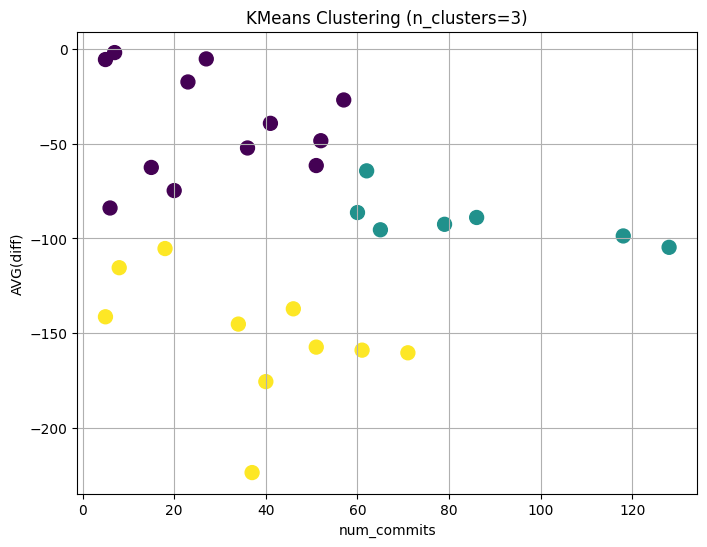

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clustering['num_commits'], df_clustering['AVG(diff)'], 
            c=df_clustering['cluster'], cmap='viridis', s=100)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('KMeans Clustering (n_clusters=3)')
plt.grid(True)
plt.show()

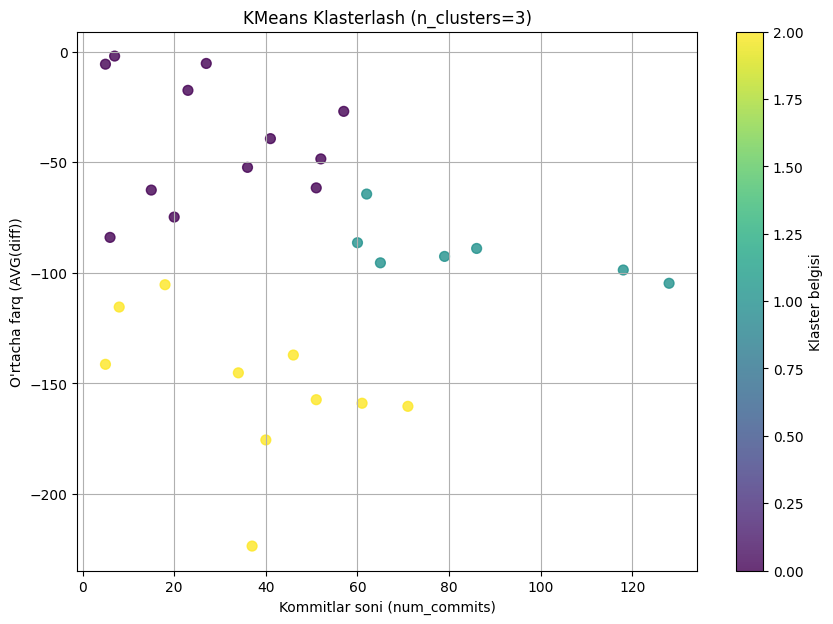

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(df_clustering['num_commits'], df_clustering['AVG(diff)'], c=df_clustering['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title('KMeans Klasterlash (n_clusters=3)')
plt.xlabel('Kommitlar soni (num_commits)')
plt.ylabel('O\'rtacha farq (AVG(diff))')
plt.colorbar(label='Klaster belgisi')
plt.grid(True)
plt.show()

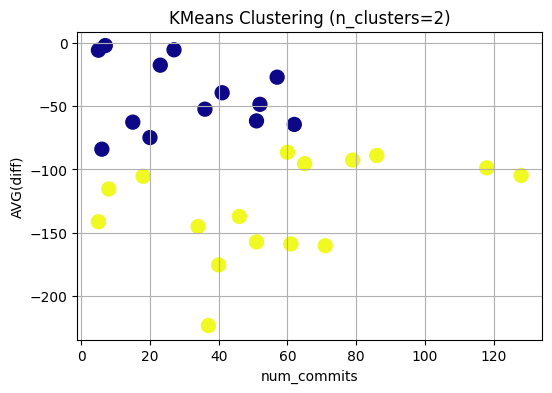

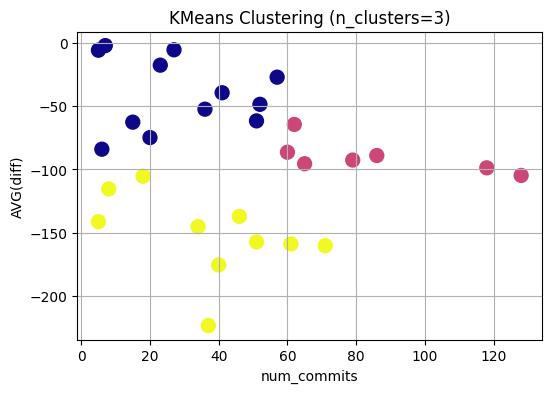

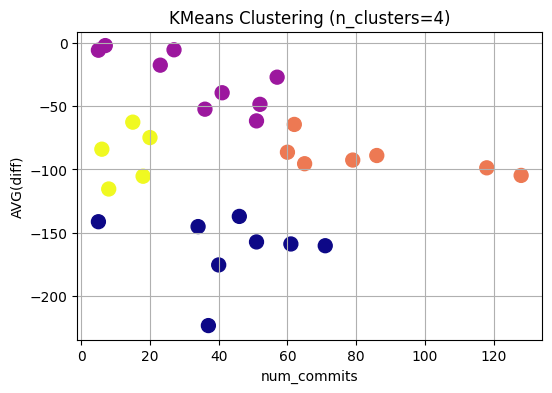

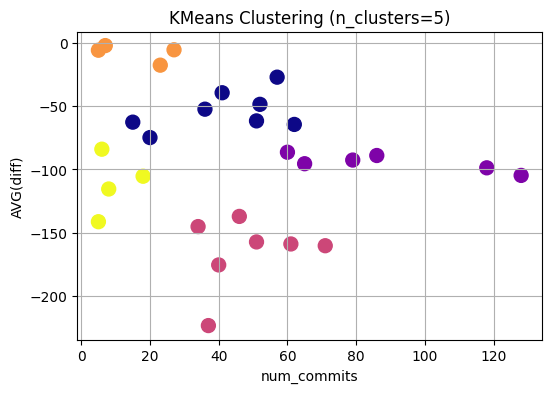

In [32]:
for k in [2, 3, 4, 5]:
    model = KMeans(n_clusters=k, random_state=21)
    labels = model.fit_predict(df_clustering[['num_commits', 'AVG(diff)']])
    
    plt.figure(figsize=(6, 4))
    plt.scatter(df_clustering['num_commits'], df_clustering['AVG(diff)'], 
                c=labels, cmap='plasma', s=100)
    plt.title(f'KMeans Clustering (n_clusters={k})')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.grid(True)
    plt.show()


In [33]:
df_clustering = df[['num_commits', 'AVG(diff)']]

# Standart masshtablash (feature scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)


kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(scaled_data)
score_3_clusters = silhouette_score(scaled_data, kmeans.labels_)


# n_clusters=3 uchun silhouette_score ni hisoblash
score_3_clusters = silhouette_score(scaled_data, kmeans.labels_)
print(f"n_clusters=3 uchun Silhouette Score: {score_3_clusters}")


n_cluster_values = [2, 3, 4, 5]

# Turli n_clusters qiymatlari uchun silhouette_score ni hisoblash
for n_clusters in n_cluster_values:
    kmeans_temp = KMeans(n_clusters=n_clusters, random_state=21, n_init=10)
    kmeans_temp.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans_temp.labels_)
    print(f"n_clusters={n_clusters} uchun Silhouette Score: {score}")

n_clusters=3 uchun Silhouette Score: 0.40371977929972475
n_clusters=2 uchun Silhouette Score: 0.3772914146031021
n_clusters=3 uchun Silhouette Score: 0.40371977929972475
n_clusters=4 uchun Silhouette Score: 0.39899504998482443
n_clusters=5 uchun Silhouette Score: 0.4830446952666659


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [34]:
df_clustering = df[['num_commits', 'AVG(diff)']].copy()

In [35]:
dbscan = DBSCAN(eps=20, min_samples=2)
df_clustering['cluster'] = dbscan.fit_predict(df_clustering)

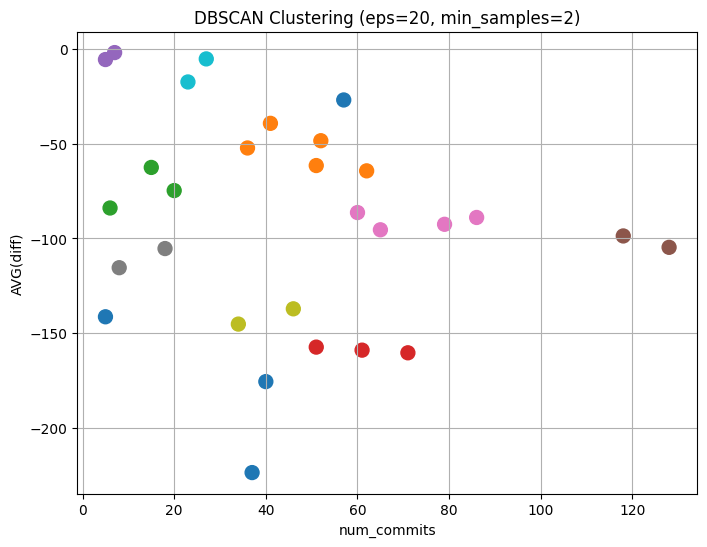

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clustering['num_commits'], df_clustering['AVG(diff)'], 
            c=df_clustering['cluster'], cmap='tab10', s=100)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('DBSCAN Clustering (eps=20, min_samples=2)')
plt.grid(True)
plt.show()


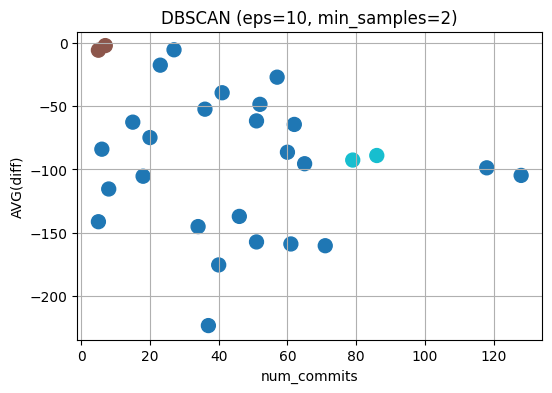

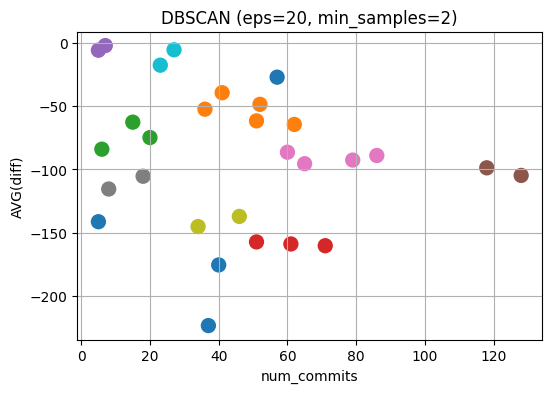

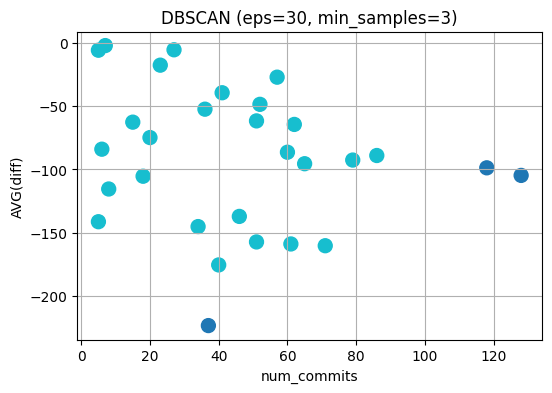

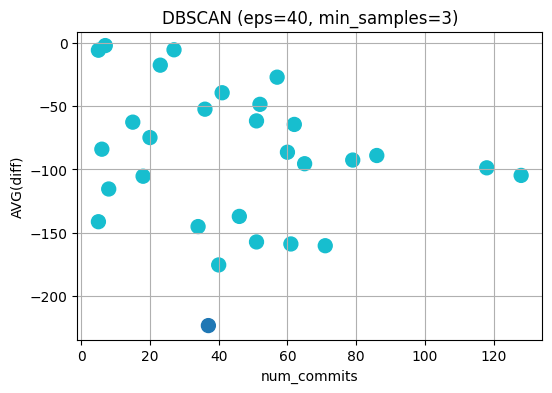

In [37]:
params = [(10, 2), (20, 2), (30, 3), (40, 3)]

for eps, min_samples in params:
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(df_clustering[['num_commits', 'AVG(diff)']])

    plt.figure(figsize=(6, 4))
    plt.scatter(df_clustering['num_commits'], df_clustering['AVG(diff)'], 
                c=labels, cmap='tab10', s=100)
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.grid(True)
    plt.show()


In [38]:
# DBSCAN klasterlashda -1 bu shovqin nuqtalar, ularni olib tashlaymiz
mask = df_clustering['cluster'] != -1
if df_clustering['cluster'].nunique() > 1 and mask.sum() > 1:
    score = silhouette_score(df_clustering[mask][['num_commits', 'AVG(diff)']], df_clustering[mask]['cluster'])
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Silhouette Score hisoblab bo'lmaydi (faqat bitta klaster yoki faqat shovqin mavjud).")


Silhouette Score: 0.544


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [39]:
# Bu pastdan yuqoriga qarab ishlaydi (ya'ni, birinchi har bir nuqta alohida klaster bo‘ladi, so‘ngra ularni bosqichma-bosqich birlashtiradi).
agg = AgglomerativeClustering(n_clusters=5)
df_clustering['cluster'] = agg.fit_predict(df_clustering)

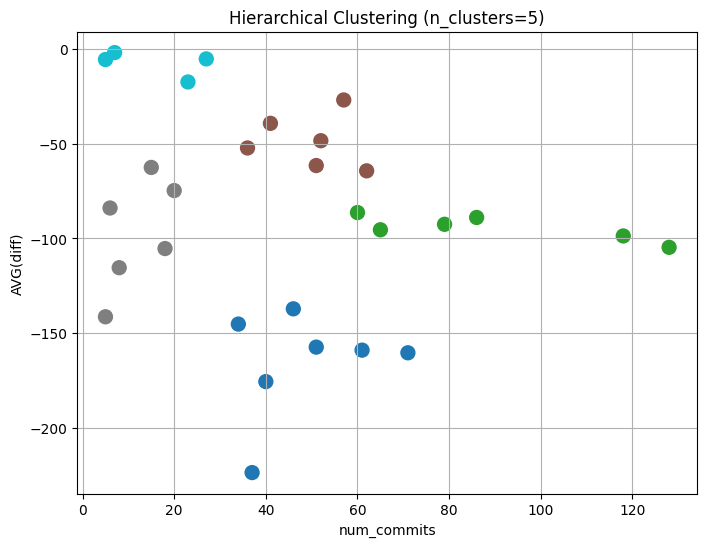

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clustering['num_commits'], df_clustering['AVG(diff)'], 
            c=df_clustering['cluster'], cmap='tab10', s=100)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('Hierarchical Clustering (n_clusters=5)')
plt.grid(True)
plt.show()

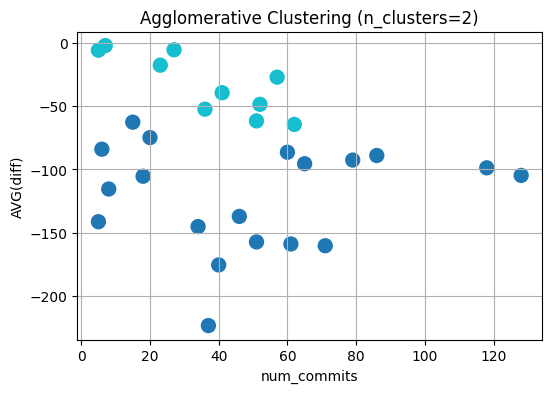

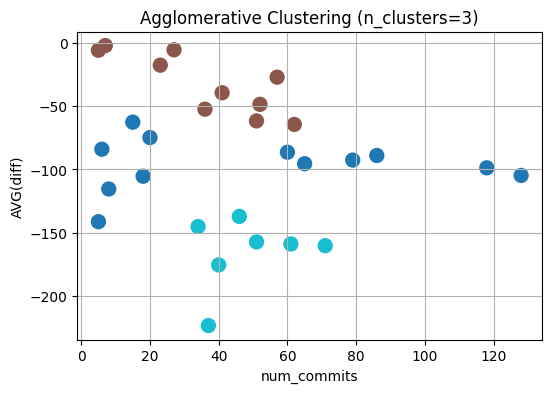

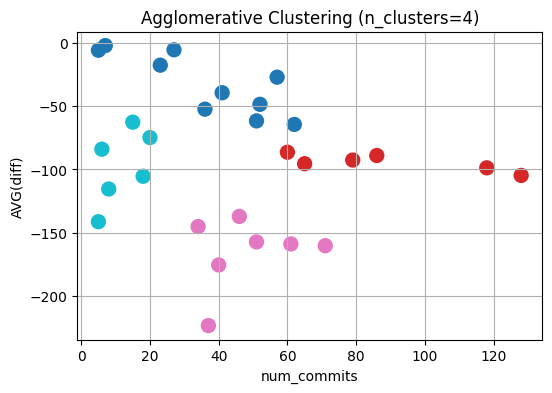

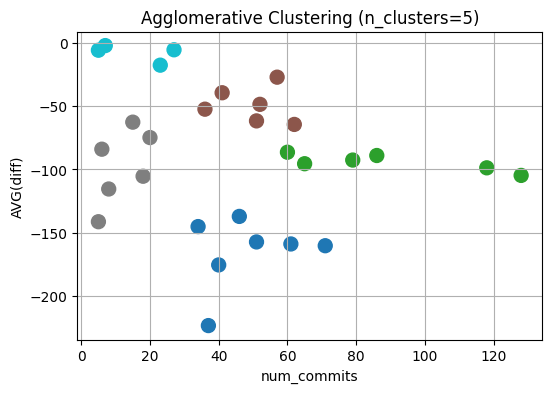

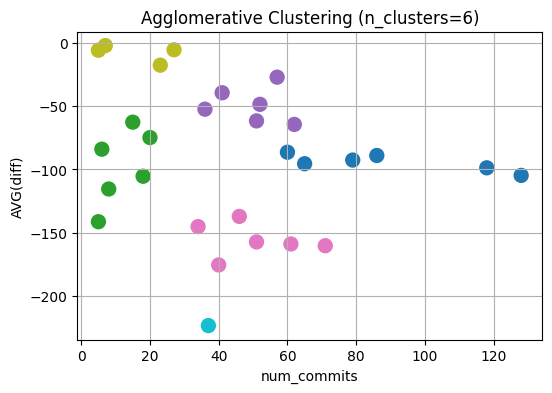

In [41]:
for k in [2, 3, 4, 5, 6]:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(df_clustering[['num_commits', 'AVG(diff)']])

    plt.figure(figsize=(6, 4))
    plt.scatter(df_clustering['num_commits'], df_clustering['AVG(diff)'], 
                c=labels, cmap='tab10', s=100)
    plt.title(f'Agglomerative Clustering (n_clusters={k})')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.grid(True)
    plt.show()


In [42]:
score = silhouette_score(df_clustering[['num_commits', 'AVG(diff)']], df_clustering['cluster'])
print(f"Silhouette Score (n_clusters=5): {score}")

Silhouette Score (n_clusters=5): 0.46383015199381467


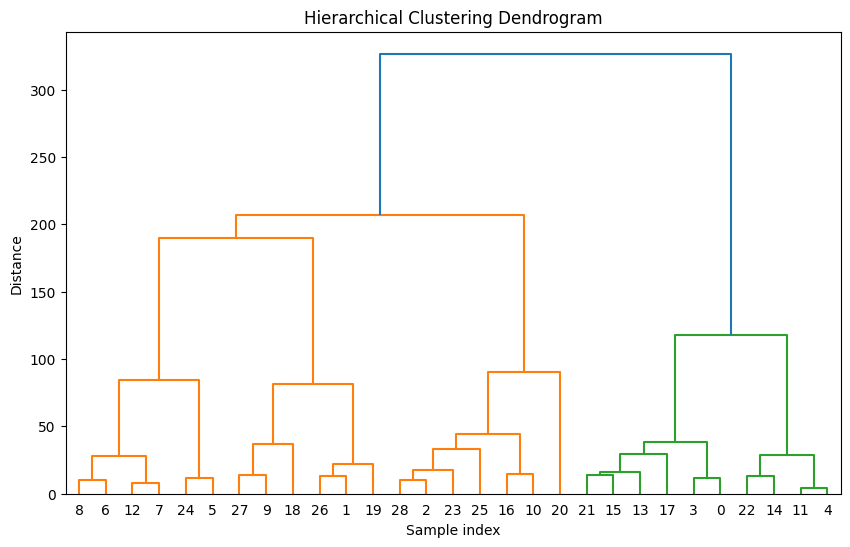

In [43]:
linked = linkage(df_clustering[['num_commits', 'AVG(diff)']], method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           leaf_rotation=0,
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [44]:
def optimize_clustering_param(model_class, model_params, param_name, param_range, X):
    """
    Klasterlash modelining parametrini silhouette_score asosida optimallashtiruvchi funksiya.

    Parametrlar:
    - model_class: Klasterlash modeli (KMeans, DBSCAN, AgglomerativeClustering va h.k.)
    - model_params: Modelga oid boshqa parametrlari (dict)
    - param_name: Optimallashtirilayotgan parametr nomi (str)
    - param_range: Parametr qiymatlari ro'yxati yoki range
    - X: Masshtablangan ma'lumotlar (numpy array, shape=(n_samples, n_features))

    Qaytaradi:
    - best_value: Eng yaxshi parametr qiymati
    - best_score: Eng yuqori silhouette_score
    - Grafiklar: silhouette_score vs param_value chizig'i va best klasterlash scatter plot
    """
    scores = []
    best_score = -1
    best_value = None
    best_labels = None

    for val in param_range:
        params = model_params.copy()
        params[param_name] = val

        try:
            model = model_class(**params)
            labels = model.fit_predict(X)

            if model_class == DBSCAN:
                mask = labels != -1
                valid_labels = labels[mask]
                valid_X = X[mask]
            else:
                valid_labels = labels
                valid_X = X

            if len(set(valid_labels)) > 1 and len(valid_X) > 1:
                score = silhouette_score(valid_X, valid_labels)
                scores.append(score)

                if score > best_score:
                    best_score = score
                    best_value = val
                    best_labels = labels
            else:
                scores.append(-1)
        except Exception as e:
            scores.append(-1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(param_range, scores, marker='o', linestyle='-', color='blue')
    plt.xlabel(param_name)
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Score vs {param_name}")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    if best_labels is not None:
        plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='tab10', s=100)
        plt.xlabel("X[0]")
        plt.ylabel("X[1]")
        plt.title(f"Best Clustering (best {param_name} = {best_value})")
        plt.grid(True)
    else:
        plt.text(0.5, 0.5, 'Klasterlash muvaffaqiyatsiz bo‘ldi',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=14, color='red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return best_value, best_score


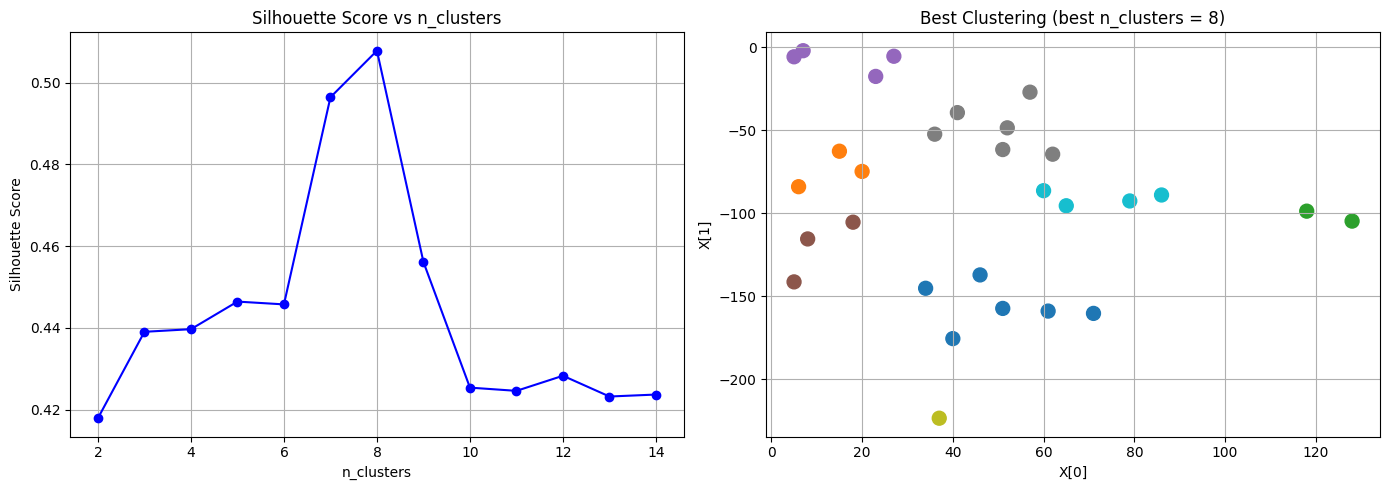

KMeans best n_clusters = 8, score = 0.508


In [45]:
X = df[['num_commits', 'AVG(diff)']].values

best_kmeans_k, score_kmeans = optimize_clustering_param(
    model_class=KMeans,
    model_params={'random_state': 21},
    param_name='n_clusters',
    param_range=range(2, 15),
    X=X
)

print(f"KMeans best n_clusters = {best_kmeans_k}, score = {score_kmeans:.3f}")

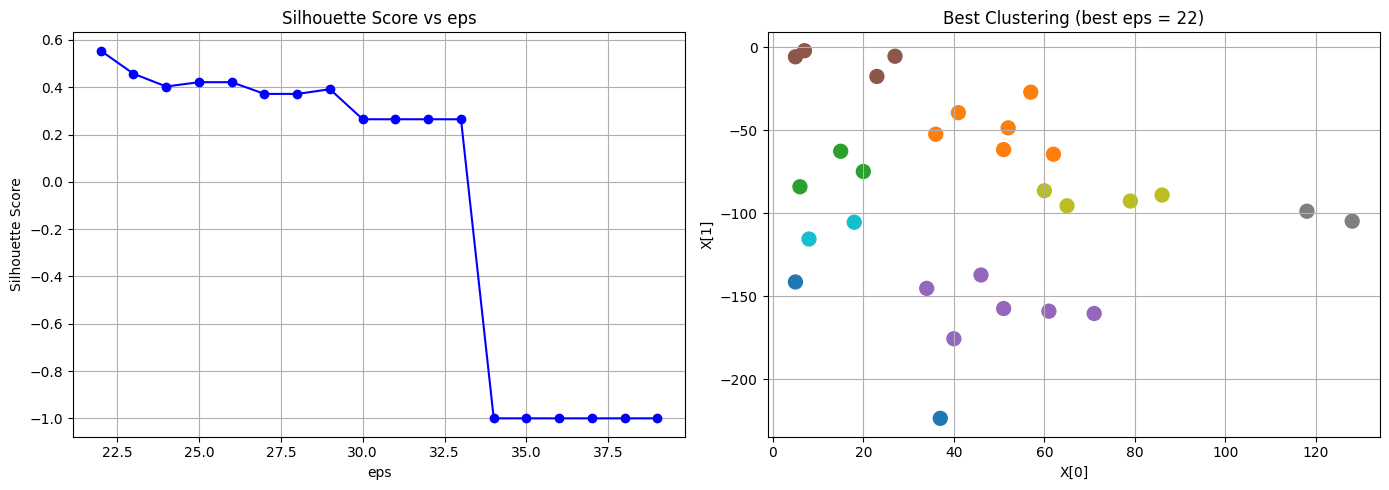

DBSCAN best eps = 22, score = 0.555


In [46]:
best_eps, score_eps = optimize_clustering_param(
    model_class=DBSCAN,
    model_params={'min_samples': 2},
    param_name='eps',
    param_range=range(22, 40),
    X=X
)

print(f"DBSCAN best eps = {best_eps}, score = {score_eps:.3f}")

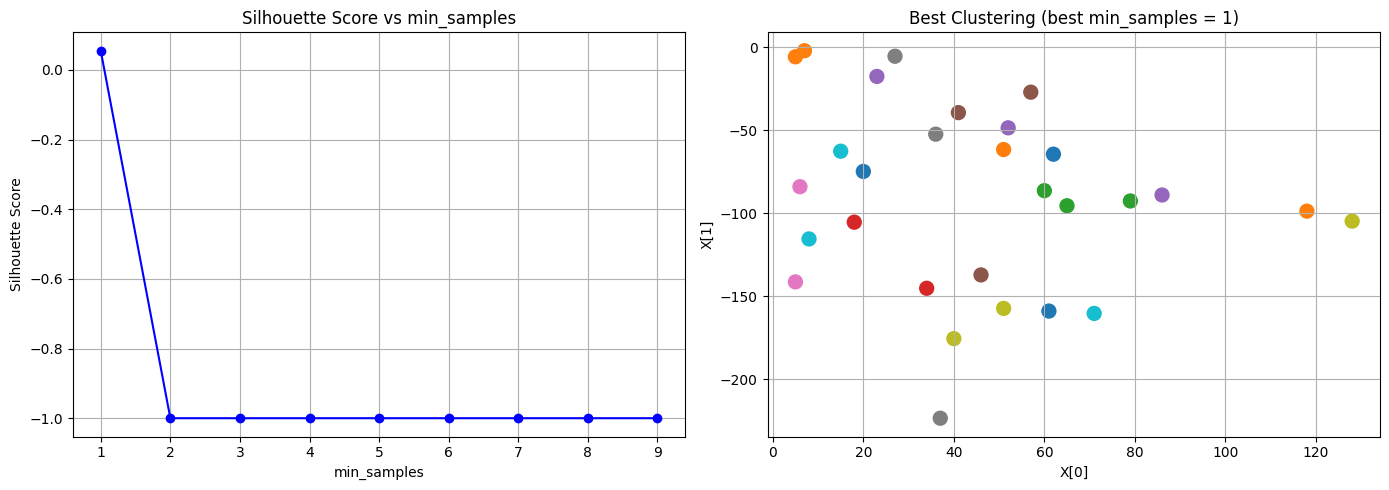

DBSCAN best min_samples = 1, score = 0.055


In [47]:
best_min_samples, score_min_samples = optimize_clustering_param(
    model_class=DBSCAN,
    model_params={'eps': 5},
    param_name='min_samples',
    param_range=range(1, 10),
    X=X
)

print(f"DBSCAN best min_samples = {best_min_samples}, score = {score_min_samples:.3f}")

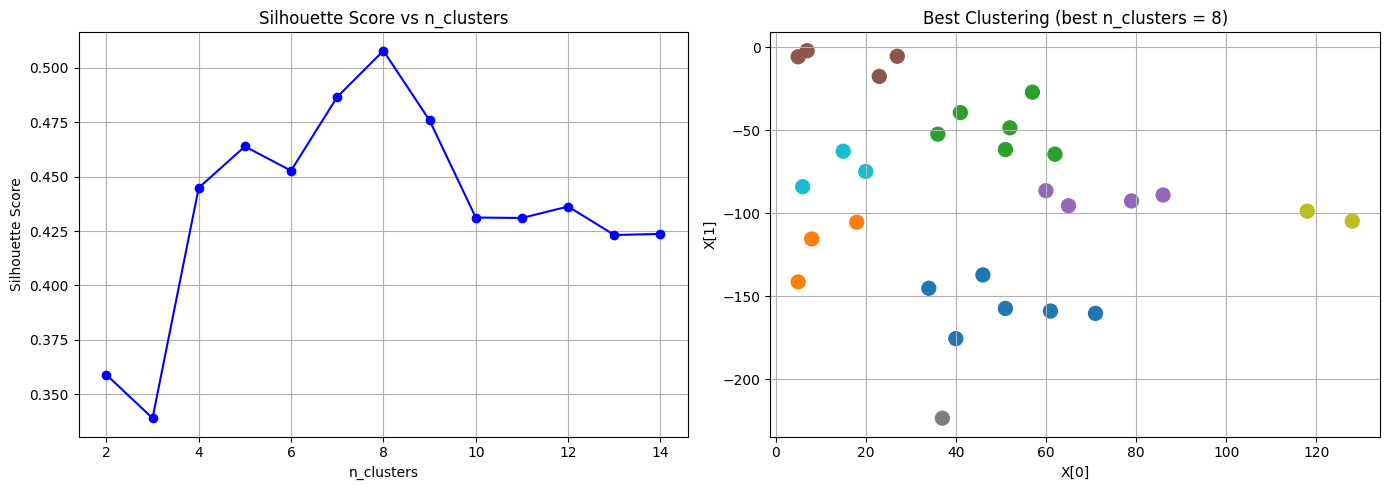

AgglomerativeClustering best n_clusters = 8, score = 0.508


In [48]:
best_agg_k, score_agg = optimize_clustering_param(
    model_class=AgglomerativeClustering,
    model_params={},
    param_name='n_clusters',
    param_range=range(2, 15),
    X=X
)

print(f"AgglomerativeClustering best n_clusters = {best_agg_k}, score = {score_agg:.3f}")